In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 100

In [2]:
sales = pd.read_csv('data/sales_train.csv')
items = pd.read_csv('data/items.csv')
categs = pd.read_csv('data/item_categories.csv')
shops = pd.read_csv('data/shops.csv')
test_pairs = pd.read_csv('data/test.csv')

In [3]:
sales.index = pd.to_datetime(sales.date, dayfirst=True)
sales.drop(['date'], axis=1, inplace=True)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2935849 entries, 2013-01-02 to 2015-10-03
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date_block_num  int64  
 1   shop_id         int64  
 2   item_id         int64  
 3   item_price      float64
 4   item_cnt_day    float64
dtypes: float64(2), int64(3)
memory usage: 134.4 MB


In [5]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


### Show Item Counts for shop and item from test pairs

In [6]:
test_pairs.drop(['ID'], axis=1, inplace=True, errors='ignore')
test_pairs.head()

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [7]:
g = sales.item_cnt_day.groupby([sales.index.year, sales.index.month, sales.shop_id, sales.item_id]).sum()
g.index.rename(('year', 'month', 'shop_id', 'item_id'), inplace=True)
g

year  month  shop_id  item_id
2013  1      0        32         6.0
                      33         3.0
                      35         1.0
                      43         1.0
                      51         2.0
                                ... 
2015  10     59       22087      6.0
                      22088      2.0
                      22091      1.0
                      22100      1.0
                      22102      1.0
Name: item_cnt_day, Length: 1609124, dtype: float64

In [24]:
multiindex = pd.MultiIndex.from_product([
    sales.index.year.unique(),
    sales.index.month.unique(),
    test_pairs.shop_id,
    test_pairs.item_id
], names=['year', 'month', 'shop_id', 'item_id'])

MemoryError: Unable to allocate 1.50 TiB for an array with shape (1651739040000,) and data type int8

In [18]:
monthly_counts = pd.Series(data=np.zeros(multiindex.shape), index=multiindex, name='cnt_month')

In [23]:
monthly_counts

year  month  shop_id  item_id
2013  1      0        0          0.0
                      1          0.0
                      2          0.0
                      3          0.0
                      4          0.0
                                ... 
2015  12     59       22165      0.0
                      22166      0.0
                      22167      0.0
                      22168      0.0
                      22169      0.0
Name: cnt_month, Length: 47887200, dtype: float64

In [113]:
g.loc[2013, 1, 0]

,date_block_num,item_price,item_cnt_day
item_id,,,
32,0,884.0,6.0
33,0,1041.0,3.0
35,0,247.0,1.0
43,0,221.0,1.0
51,0,257.0,2.0
...,...,...,...
22134,0,2750.0,13.0
22135,0,692.0,2.0
22140,0,312.0,1.0


In [95]:
sales.shape

(2935849, 5)

In [91]:
for i in range(0, 1):
    shop_id, item_id = test_pairs.iloc[i][['shop_id', 'item_id']].values
    title = f'{items.iloc[item_id].item_name}({item_id}) в {shops.iloc[shop_id].shop_name}({shop_id})'
    item_cnt_month = sales.loc[(sales.shop_id == shop_id) & (sales.item_id == item_id)][['item_cnt_day']].groupby(sales.index.month).sum()
    ax = item_cnt_day.plot(title=title)
    ax.set_xticks(sales.index.unique()[::12])
    ax.set_xticklabels(sales.index.unique()[::12], rotation=90)
    print(item_cnt_day)

ValueError: Grouper and axis must be same length

In [78]:
sales.index.unique()

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-05', '2013-01-06',
               '2013-01-15', '2013-01-10', '2013-01-04', '2013-01-11',
               '2013-01-07', '2013-01-08',
               ...
               '2015-10-27', '2015-10-29', '2015-10-07', '2015-10-22',
               '2015-10-06', '2015-10-26', '2015-10-19', '2015-10-28',
               '2015-10-25', '2015-10-13'],
              dtype='datetime64[ns]', name='date', length=1034, freq=None)

In [125]:
type(g)

pandas.core.series.Series

In [75]:
sales.loc[(sales.shop_id == 5) & (sales.item_id == 5232)]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2015-08-28,31,5,5232,599.0,1.0


In [38]:
%%time
sales.loc[(sales.shop_id == 10) & (sales.index >= '2013-01-01') & (sales.index < '2013-03-01')]

CPU times: user 38.6 ms, sys: 3.2 ms, total: 41.8 ms
Wall time: 44.8 ms


,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-26,0,10,6000,190.0,1.0
2013-01-12,0,10,6007,180.0,1.0
2013-01-08,0,10,6093,200.0,1.0
2013-01-12,0,10,6093,200.0,1.0
2013-01-13,0,10,6095,1321.0,1.0
...,...,...,...,...,...
2013-02-12,1,10,3328,1589.0,1.0
2013-02-13,1,10,3328,1589.0,1.0
2013-02-15,1,10,3328,1589.0,1.0


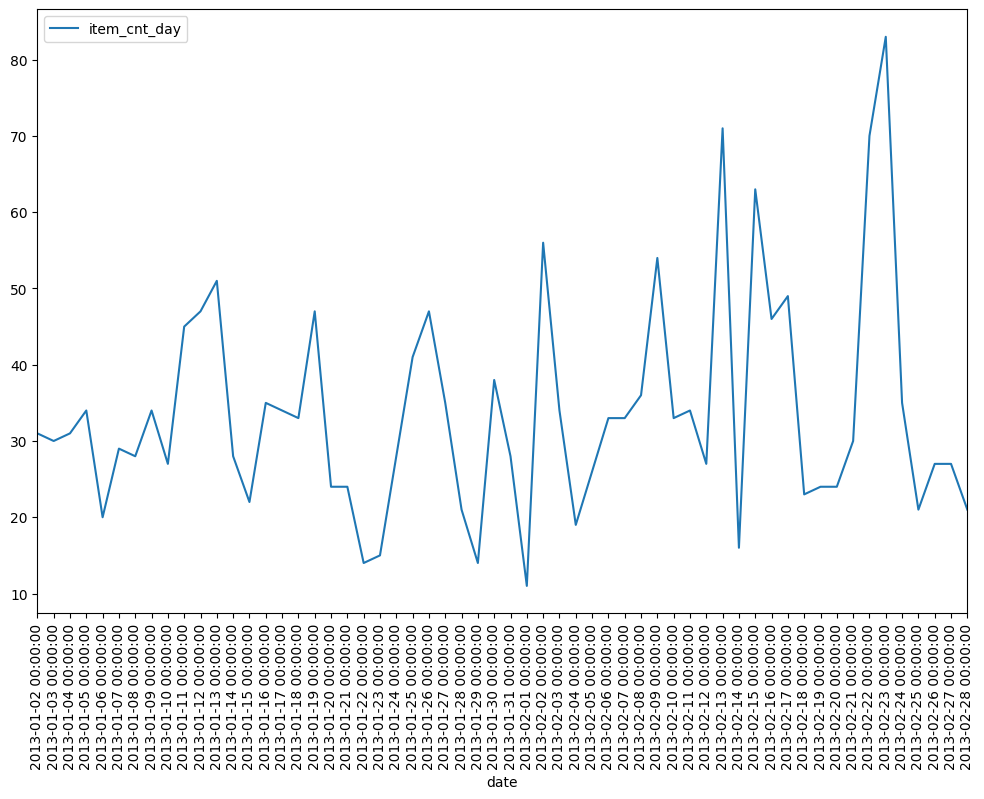

In [23]:
for shop in range(10):
    jan_2013 = sales.loc[(sales.shop_id == 10) & (sales.date >= '2013-01-01') & (sales.date < '2013-03-01')].groupby('date').sum()
ax = jan_2013_shop10.plot(y='item_cnt_day')
ax.set_xticks(jan_2013_shop10.index)
ax.set_xticklabels(jan_2013_shop10.index, rotation=90);